
**Problem Statement**: Predicting Energy Consumption

**Project Description**: Create a regression model to predict the energy consumption of a building based on factors such as temperature, humidity, and occupancy.

**Domain**: Energy Management

**Dataset Link**: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption


In [18]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.impute import SimpleImputer
import seaborn as sns
sns.set(rc={'figure.figsize': (12,8)})


####Importing data


In [2]:
df = pd.read_csv('/content/household_power_consumption.txt', sep=";")
df.head()


<ipython-input-2-51818f9451a5>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt', sep=";")


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

# Feature Modification

In [4]:

# Convert 'Date' and 'Time' columns to string type
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

# Replace missing values with mean
df.replace(['?', 'nan', np.nan], -1, inplace=True)

#numerical columns
num_vars = ['Global_active_power', 'Global_reactive_power', 'Voltage',
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

# Convert numerical columns to numeric data type
for i in num_vars:
    df[i] = pd.to_numeric(df[i])

# Impute missing values with the mean of each column
imp = SimpleImputer(missing_values=-1, strategy='mean')
df[num_vars] = imp.fit_transform(df[num_vars])

# Target Variable Calculation
eq1 = (df['Global_active_power'] * 1000 / 60)  # Convert active power to kWh
eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']  # Total sub-metering values
df['power_consumption'] = eq1 - eq2  # Power consumption in kWh


In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [6]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
 9   power_consumption      float64
dtypes: float64(8), object(2)
memory usage: 158.3+ MB


Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
power_consumption        0
dtype: int64

In [7]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumption
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00,9.525726e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


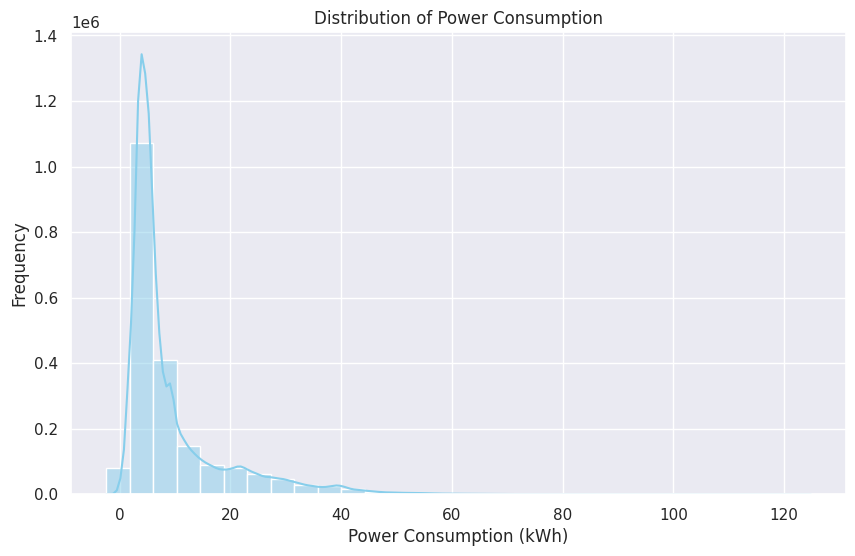

In [8]:
#Distribution of Power Consumption
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='power_consumption', bins=30, kde=True, color='skyblue')
plt.xlabel('Power Consumption (kWh)')
plt.ylabel('Frequency')
plt.title('Distribution of Power Consumption')
plt.show()


# Correlation analysis

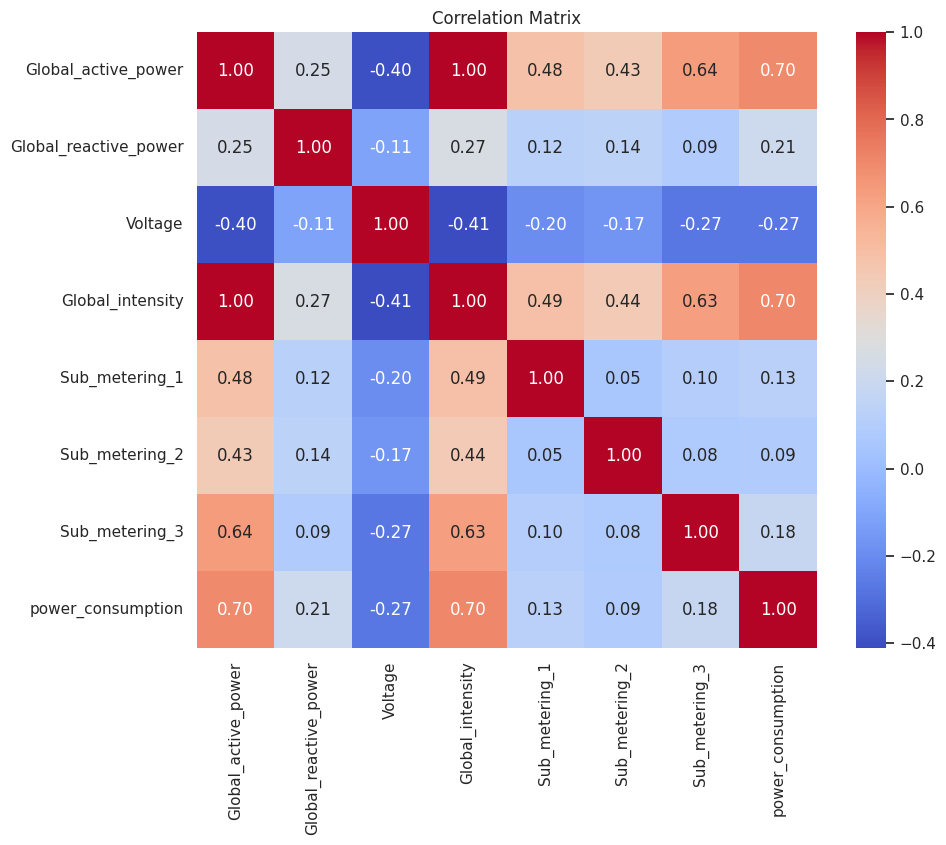

In [9]:
# Correlation analysis
# Exclude non-numeric columns before calculating correlation matrix
numeric_df = df.drop(['Date', 'Time'], axis=1)
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [14]:
# Define features (X) and target variable (y)
X = df.drop(['Date', 'Time', 'Global_active_power'], axis=1)  # Exclude non-numeric columns and target variable
y = df['Global_active_power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1660207, 7)
X_test shape: (415052, 7)
y_train shape: (1660207,)
y_test shape: (415052,)


## Model Bulding

In [15]:
# Function to evaluate the model
def model_evaluator(y_true, y_pred):
    mae = round(mean_absolute_error(y_true, y_pred), 10)
    rmse = round(mean_squared_error(y_true, y_pred, squared=False), 10)
    r2 = round(r2_score(y_true, y_pred), 10)
    ev = round(explained_variance_score(y_true, y_pred), 10)
    return mae, rmse, r2, ev

# Dictionary containing regression model objects from different algorithms
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Support Vector Regressor": SVR(),
    "Decision Tree Regressor": DecisionTreeRegressor()
}

# Lists to store model performance metrics
model_names = []
mae_train_list = []
rmse_train_list = []
r2_train_list = []
ev_train_list = []
mae_test_list = []
rmse_test_list = []
r2_test_list = []
ev_test_list = []


In [16]:

# Function for model training and evaluation
def model_trainer_evaluator(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    mae_train, rmse_train, r2_train, ev_train = model_evaluator(y_train, y_train_pred)
    mae_test, rmse_test, r2_test, ev_test = model_evaluator(y_test, y_test_pred)

    return mae_train, rmse_train, r2_train, ev_train, mae_test, rmse_test, r2_test, ev_test

# Train and evaluate each model
for model_name, model in models.items():
    mae_train, rmse_train, r2_train, ev_train, mae_test, rmse_test, r2_test, ev_test = model_trainer_evaluator(
        model, X_train, y_train, X_test, y_test)

    # Append model performance metrics to lists
    model_names.append(model_name)
    mae_train_list.append(mae_train)
    rmse_train_list.append(rmse_train)
    r2_train_list.append(r2_train)
    ev_train_list.append(ev_train)
    mae_test_list.append(mae_test)
    rmse_test_list.append(rmse_test)
    r2_test_list.append(r2_test)
    ev_test_list.append(ev_test)


In [17]:

# Create a DataFrame to store model performance metrics
regression_model_df = pd.DataFrame({
    'Model': model_names,
    'Train_MAE': mae_train_list,
    'Train_RMSE': rmse_train_list,
    'Train_R2': r2_train_list,
    'Train_EV': ev_train_list,
    'Test_MAE': mae_test_list,
    'Test_RMSE': rmse_test_list,
    'Test_R2': r2_test_list,
    'Test_EV': ev_test_list
})
# Sort the DataFrame by Test RMSE in ascending order
regression_model_df = regression_model_df.sort_values(by='Test_RMSE', ascending=True).reset_index(drop=True)
regression_model_df


,Model,Train_MAE,Train_RMSE,Train_R2,Train_EV,Test_MAE,Test_RMSE,Test_R2,Test_EV
0,Linear Regression,0.000000e+00,0.000000e+00,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000
1,Ridge Regression,1.352000e-07,2.143000e-07,1.000000,1.000000,1.353000e-07,2.147000e-07,1.000000,1.000000
2,Decision Tree Regressor,0.000000e+00,0.000000e+00,1.000000,1.000000,4.283348e-03,1.993300e-02,0.999640,0.999640
3,Support Vector Regressor,4.096435e-02,4.634466e-02,0.998054,0.998139,4.100466e-02,4.638014e-02,0.998052,0.998138
4,ElasticNet Regression,7.972808e-02,1.328991e-01,0.983998,0.983998,7.983725e-02,1.329587e-01,0.983993,0.983993
5,Lasso Regression,1.534216e-01,2.542439e-01,0.941436,0.941436,1.536547e-01,2.543936e-01,0.941401,0.941401


Based on the evaluation metrics obtained from training and testing the regression models, we can draw the following conclusions:

1. **Linear Regression** and **Ridge Regression** models achieved perfect scores (Train R^2 = 1.0, Test R^2 = 1.0) on both training and testing datasets, indicating a perfect fit and excellent generalization capability.

2. The **Decision Tree Regressor** performed exceptionally well on the training dataset, achieving perfect scores, but slightly lower on the testing dataset (Test R^2 = 0.99964). This indicates some overfitting, although the model still generalizes very well.

3. **Support Vector Regressor** exhibited high accuracy and generalization capability with an R^2 score of approximately 0.998 on both training and testing datasets, indicating strong predictive power.

4. **ElasticNet Regression** and **Lasso Regression** models also performed well, with R^2 scores above 0.98 on both training and testing datasets. These models demonstrated good predictive performance and generalization.

In summary, the **Linear Regression**, **Ridge Regression**, **Decision Tree Regressor**, and **Support Vector Regressor** models stand out for their excellent performance and generalization capability, while **ElasticNet Regression** and **Lasso Regression** models also provide solid performance, albeit slightly lower than the former.
